In [29]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import copy

# Local imports
import sys
sys.path.append('../../')
import stlstuff as sls
import imagestuff as ims

In [30]:
# Graphics
%matplotlib notebook

In [31]:
# Get the retrieved surface
surfaceroot = 'case1.5'
npzfile = np.load(surfaceroot+'/retrieved.npz')
imageroot = np.array_str(npzfile['imageroot'])

dx,dy,cA,cB,cC,cD,Filename = ims.getc2tif(surfaceroot, '/SEMimages', imageroot)
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']

nxi = npzfile['nxi']; #print(nxi)
nyi = npzfile['nyi']; #print(nyi)
dnx = npzfile['dnx']; print(dnx)
dny = npzfile['dny']; print(dny)
solution = npzfile['solution']; #print(np.shape(solution))
print (dx)

0.09803921568627416
0.09999999999999964
1.090316


In [32]:
# Extract the surface
nx1tot = min(nx1list)
nx2tot = max(nx2list)
ny1tot = min(ny1list)
ny2tot = max(ny2list)
nxtot = nx2tot-nx1tot
nytot = ny2tot-ny1tot
settemp = solution[ny1tot:ny2tot,nx1tot:nx2tot]; print (np.shape(settemp))

(80, 90)


97.03812400000001
86.13496400000001


<IPython.core.display.Javascript object>


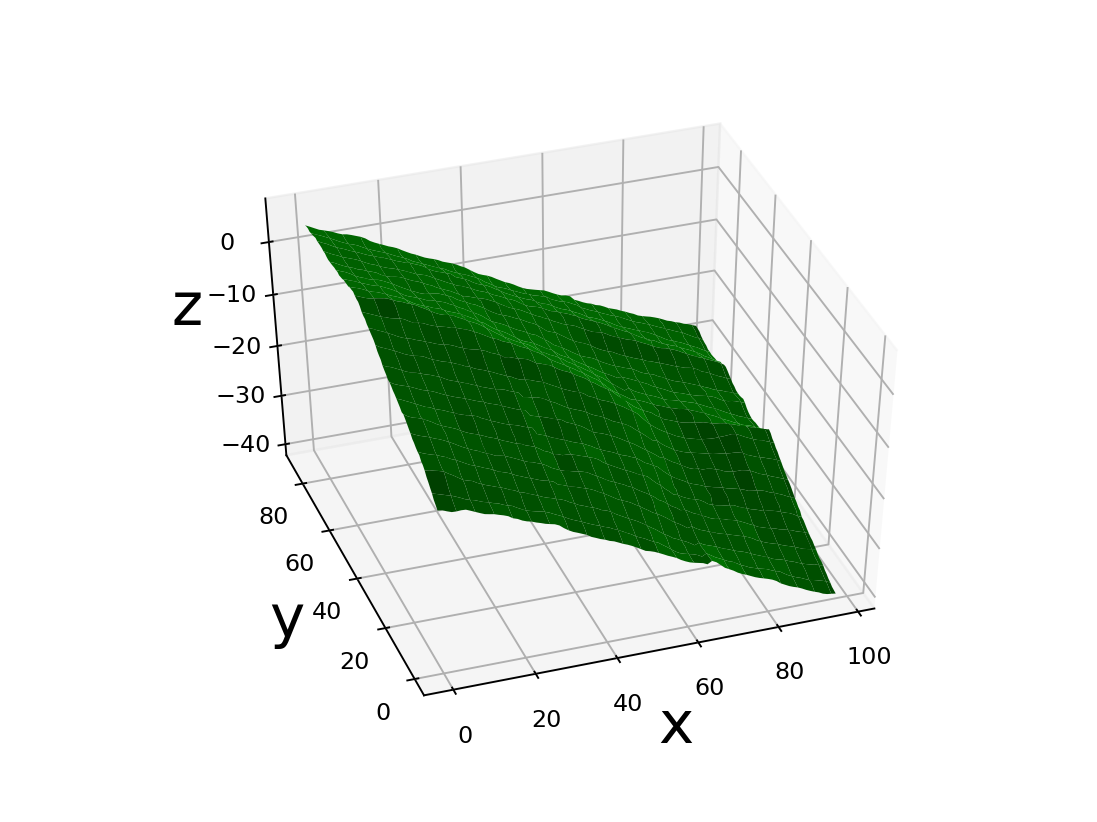

Text(0.5,0,'z')

In [33]:
# Display the surface here

# Set display parameters
fontsize = 25
linewidth = 2
xmaxtot = (nxtot-1)*dx; print (xmaxtot)
ymaxtot = (nytot-1)*dy; print (ymaxtot)
surf_ytot = np.linspace(0,ymaxtot,nytot); #print surf_ytot[1]-surf_ytot[0]; 
surf_xtot = np.linspace(0,xmaxtot,nxtot); #print surf_xtot[1]-surf_xtot[0]; 
surf_xgridtot, surf_ygridtot = np.meshgrid(surf_xtot,surf_ytot)
surf_ygridtot_flipped = np.flipud(surf_ygridtot)

# Display it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(surf_xgridtot, surf_ygridtot_flipped, settemp, rstride=4,cstride=4, color='g')
ax.view_init(azim=-100,elev=22)
ax.set_xlabel('x',fontsize=fontsize)
ax.set_ylabel('y',fontsize=fontsize)
ax.set_zlabel('z',fontsize=fontsize)

# Tailor these lines for each case
# ax.set_xticks([i for i in range(0,100,25)])
# ax.set_yticks([i for i in range(0,250,100)])
# ax.set_zticks([i for i in range(0,100,50)])

In [34]:
# Save as stl (with possible vertical amplification)
sls.numpy2stl(settemp, surfaceroot+'/retrieved.stl', scale=dx, solid=False)
print('Complete')

Creating top mesh...
Complete


In [35]:
# create a new settemp2
#settemp2 = copy.deepcopy(settemp)
#depth=-5
#ny, nx=np.shape(settemp); print(ny,nx)
#yline=depth * np.ones(ny); print(np.shape(yline)); print(yline)